# ACATHON PSB

#### Chargement des packages.

# modelisation: B_CONTRACTOR_SME

In [1]:
import pandas as pd
import numpy as np
import datetime
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import log_loss
from sklearn.model_selection import train_test_split
#from lightgbm import LGBMClassifier

np.random.seed(1337)

In [2]:
# Load train
data = pd.read_csv(filepath_or_buffer='dataChallenge_training.csv',
                    sep=',',
                    low_memory=False,
                   error_bad_lines=False
                    #index_col=1
                   )

train = data.copy()

In [68]:
train.shape

(2216338, 21)

In [5]:
train.columns

Index(['ID_AW', 'LOTS_NUMBER', 'YEAR', 'ISO_COUNTRY_CODE', 'TYPE_OF_CONTRACT',
       'CAE_TYPE', 'TOP_TYPE', 'MAIN_ACTIVITY', 'CPV', 'B_ELECTRONIC_AUCTION',
       'B_DYN_PURCH_SYST', 'B_FRA_AGREEMENT', 'B_GPA', 'B_ON_BEHALF',
       'B_SUBCONTRACTED', 'CRIT_CODE', 'CRIT_PRICE_WEIGHT', 'NUMBER_AWARDS',
       'B_CONTRACTOR_SME', 'NUMBER_OFFERS', 'AWARD_VALUE_EURO'],
      dtype='object')

In [6]:
pd.set_option('display.max_columns', train.shape[1])
train.head()

,ID_AW,LOTS_NUMBER,YEAR,ISO_COUNTRY_CODE,TYPE_OF_CONTRACT,CAE_TYPE,TOP_TYPE,MAIN_ACTIVITY,CPV,B_ELECTRONIC_AUCTION,B_DYN_PURCH_SYST,B_FRA_AGREEMENT,B_GPA,B_ON_BEHALF,B_SUBCONTRACTED,CRIT_CODE,CRIT_PRICE_WEIGHT,NUMBER_AWARDS,B_CONTRACTOR_SME,NUMBER_OFFERS,AWARD_VALUE_EURO
0,166255558.0,1.0,2017,LT,U,1,OPE,Public Order and Safety,CPV38434560,N,NaN,N,Y,N,N,L,100.0,1,NaN,5.0,104907.00
1,66046540.0,0.0,2010,FR,W,3,OPE,General public\services,CPV45232410,N,NaN,N,N,N,NaN,M,NaN,1,NaN,8.0,429772.00
2,66046561.0,0.0,2010,FR,W,3,OPE,General public\services,CPV45232140,N,NaN,N,NaN,N,NaN,M,NaN,1,NaN,5.0,417719.50
3,66046582.0,22.0,2010,FR,W,8,OPE,Housing and community amenities,CPV45215212,N,NaN,N,N,N,NaN,M,NaN,22,NaN,8.0,208414.11
4,66046603.0,22.0,2010,FR,W,8,OPE,Housing and community amenities,CPV45215212,N,NaN,N,N,N,NaN,M,NaN,22,NaN,6.0,101800.10


In [7]:
print(round(train.isnull().sum()/train.shape[0]*100, 2))

ID_AW                    0.00
LOTS_NUMBER              2.49
YEAR                     0.00
ISO_COUNTRY_CODE         0.00
TYPE_OF_CONTRACT         0.00
CAE_TYPE                 0.00
TOP_TYPE                 0.32
MAIN_ACTIVITY            5.32
CPV                      0.00
B_ELECTRONIC_AUCTION    13.60
B_DYN_PURCH_SYST        86.44
B_FRA_AGREEMENT          1.63
B_GPA                   15.77
B_ON_BEHALF             11.86
B_SUBCONTRACTED         21.45
CRIT_CODE                8.09
CRIT_PRICE_WEIGHT       53.17
NUMBER_AWARDS            0.00
B_CONTRACTOR_SME        85.53
NUMBER_OFFERS           10.48
AWARD_VALUE_EURO         0.00
dtype: float64


In [69]:
train = train[train['B_CONTRACTOR_SME'].notnull()]
print('la base actuelle après suppression des NA de la varaible cible a: ', train.shape[0], 'lignes')

la base actuelle après suppression des NA de la varaible cible a:  320800 lignes


In [70]:
print('N = ', round(train.B_SUBCONTRACTED.value_counts()[0]/train.shape[0], 2)*100, '%\n'\
     'Y = ',round(train.B_SUBCONTRACTED.value_counts()[1]/train.shape[0], 2)*100, '%')

N =  94.0 %
Y =  6.0 %


In [41]:
print(round(train.isnull().sum()/train.shape[0]*100, 2))

ID_AW                    0.00
LOTS_NUMBER              0.00
YEAR                     0.00
ISO_COUNTRY_CODE         0.00
TYPE_OF_CONTRACT         0.00
CAE_TYPE                 0.00
TOP_TYPE                 0.12
MAIN_ACTIVITY            0.00
CPV                      0.00
B_ELECTRONIC_AUCTION     1.57
B_DYN_PURCH_SYST        12.73
B_FRA_AGREEMENT         11.41
B_GPA                   12.71
B_ON_BEHALF              0.00
B_SUBCONTRACTED          0.27
CRIT_CODE               12.73
NUMBER_AWARDS            0.00
B_CONTRACTOR_SME         0.00
NUMBER_OFFERS            0.00
AWARD_VALUE_EURO         0.00
dtype: float64


In [71]:
train.drop(columns = 'CRIT_PRICE_WEIGHT', inplace = True)

In [72]:
train =  train.drop_duplicates()

In [73]:
train.select_dtypes(include = 'object').columns.tolist()

['ISO_COUNTRY_CODE',
 'TYPE_OF_CONTRACT',
 'CAE_TYPE',
 'TOP_TYPE',
 'MAIN_ACTIVITY',
 'CPV',
 'B_ELECTRONIC_AUCTION',
 'B_DYN_PURCH_SYST',
 'B_FRA_AGREEMENT',
 'B_GPA',
 'B_ON_BEHALF',
 'B_SUBCONTRACTED',
 'CRIT_CODE',
 'B_CONTRACTOR_SME']

In [74]:
train.select_dtypes(exclude ='object').columns.tolist()

['ID_AW',
 'LOTS_NUMBER',
 'YEAR',
 'NUMBER_AWARDS',
 'NUMBER_OFFERS',
 'AWARD_VALUE_EURO']

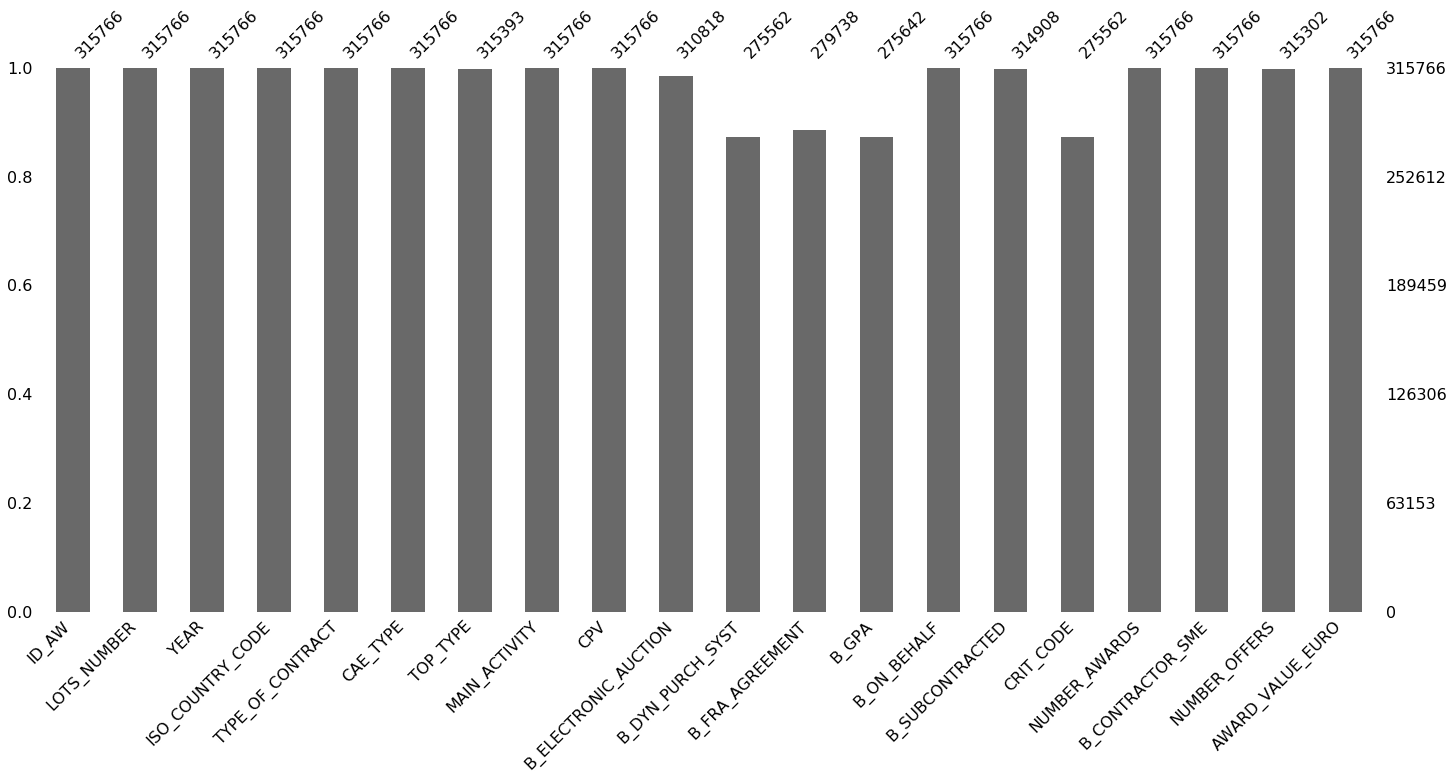

In [75]:
import missingno as msno
msno.bar(train)

In [62]:
for col in train.select_dtypes(include = "object").columns:
    mode = train[col].mode()
    train[col] = train[col].fillna(mode) 
    
    
for col in train.select_dtypes(exclude = "object").columns:
    mode = train[col].median()
    train[col] = train[col].fillna(mode)     

## Features Ingeenering

In [76]:
from sklearn.preprocessing import LabelEncoder

train.YEAR = train.YEAR.astype('object') 

# list categorical features
categorical_features = [
    'YEAR',
'ISO_COUNTRY_CODE',
 'TYPE_OF_CONTRACT',
 'CAE_TYPE',
 'TOP_TYPE',
 'MAIN_ACTIVITY',
 'CPV',
 'B_ELECTRONIC_AUCTION',
 'B_DYN_PURCH_SYST',
 'B_FRA_AGREEMENT',
 'B_GPA',
 'B_ON_BEHALF',
 #'B_SUBCONTRACTED',
 'CRIT_CODE'
]

for col in train[categorical_features].columns.tolist():
    train[col] = train[col].astype(str)
    
# label encoding
from sklearn.preprocessing import LabelEncoder
for var in categorical_features:
    encoder = LabelEncoder()
    train['le_{}'.format(var)] = encoder.fit_transform(train[var])
    train.loc[train[var].isnull(), 'le_{}'.format(var)] = -1
    

In [77]:
# value counts
for var in categorical_features:
    mapping_vc = train[var].value_counts()
    train['vc_{}'.format(var)] = train[var].map(mapping_vc)

In [78]:

# Split the dataset into a train and valid set:
train.rename(columns={'B_CONTRACTOR_SME': 'target'},
             inplace=True)


predictors = [
    
 'NUMBER_AWARDS',

 'NUMBER_OFFERS',
 'AWARD_VALUE_EURO',
 'le_ISO_COUNTRY_CODE',
 'le_TYPE_OF_CONTRACT',
 'le_CAE_TYPE',
 'le_TOP_TYPE',
 'le_MAIN_ACTIVITY',
 'le_CPV',
 'le_B_ELECTRONIC_AUCTION',
 'le_B_DYN_PURCH_SYST',
 'le_B_FRA_AGREEMENT',
 'le_B_GPA',
 'le_B_ON_BEHALF',
 'le_CRIT_CODE',
 'vc_ISO_COUNTRY_CODE',
 'vc_TYPE_OF_CONTRACT',
 'vc_CAE_TYPE',
 'vc_TOP_TYPE',
 'vc_MAIN_ACTIVITY',
 'vc_CPV',
 'vc_B_ELECTRONIC_AUCTION',
 'vc_B_DYN_PURCH_SYST',
 'vc_B_FRA_AGREEMENT',
 'vc_B_GPA',
 'vc_B_ON_BEHALF',
 'vc_CRIT_CODE'
]

response = 'target'

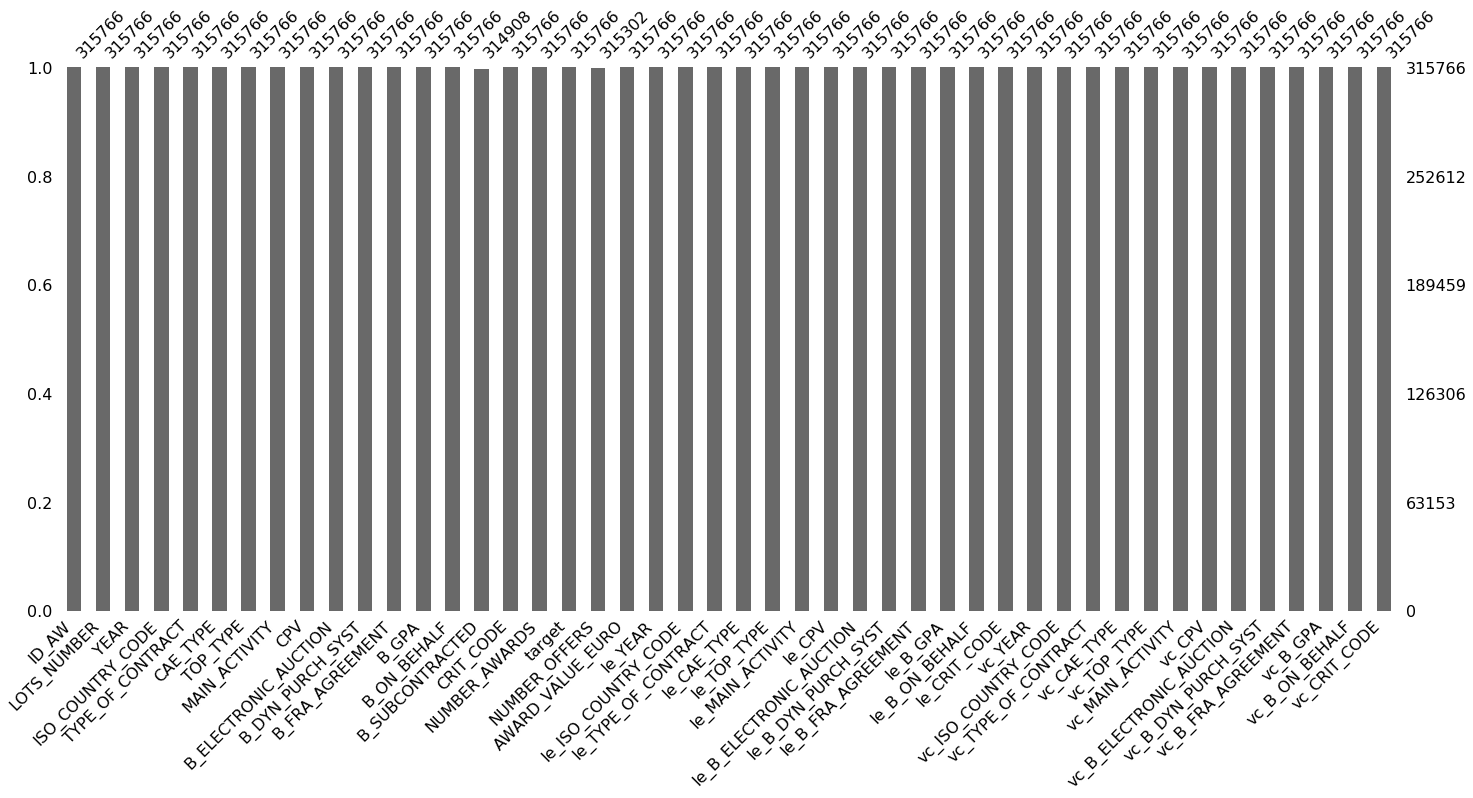

In [79]:
import missingno as msno
msno.bar(train)

In [80]:
data_h2o = h2o.H2OFrame(train)
train_h2o, test_h2o = data_h2o.split_frame(ratios=[.7], seed=1234)

Parse progress: |█████████████████████████████████████████████████████████| 100%


### Modélisation avec H2O

In [3]:
import h2o
from h2o.estimators.gbm import H2OGradientBoostingEstimator
h2o.init()

# Rename target


#train = train.drop(columns ='ID_AW')

Checking whether there is an H2O instance running at http://localhost:54321 ..... not found.
Attempting to start a local H2O server...
  Java Version: java version "13" 2019-09-17; Java(TM) SE Runtime Environment (build 13+33); Java HotSpot(TM) 64-Bit Server VM (build 13+33, mixed mode, sharing)
  Starting server from /Users/mac/anaconda3/lib/python3.7/site-packages/h2o/backend/bin/h2o.jar
  Ice root: /var/folders/zx/wsykl0bj02369qljytky4hv40000gn/T/tmpziabbjuh
  JVM stdout: /var/folders/zx/wsykl0bj02369qljytky4hv40000gn/T/tmpziabbjuh/h2o_mac_started_from_python.out
  JVM stderr: /var/folders/zx/wsykl0bj02369qljytky4hv40000gn/T/tmpziabbjuh/h2o_mac_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


H2O_cluster_uptime:,02 secs
H2O_cluster_timezone:,Europe/Paris
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.30.0.6
H2O_cluster_version_age:,3 months and 20 days !!!
H2O_cluster_name:,H2O_from_python_mac_aqi73g
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,2 Gb
H2O_cluster_total_cores:,4
H2O_cluster_allowed_cores:,4
H2O_cluster_status:,"accepting new members, healthy"


In [82]:
# try using the `model_id` parameter:
# first initialize your estimator
gbm_0 = H2OGradientBoostingEstimator(model_id = "first_model", seed = 1234)

# training_frame and validation_frame
gbm_0.train(x = predictors, y = response, training_frame = train_h2o, validation_frame = test_h2o)

gbm Model Build progress: |███████████████████████████████████████████████| 100%


In [83]:
gbm_0

Model Details
H2OGradientBoostingEstimator :  Gradient Boosting Machine
Model Key:  first_model


Model Summary: 


,,number_of_trees,number_of_internal_trees,model_size_in_bytes,min_depth,max_depth,mean_depth,min_leaves,max_leaves,mean_leaves
0,,50.0,50.0,22782.0,5.0,5.0,5.0,27.0,32.0,31.6




ModelMetricsBinomial: gbm
** Reported on train data. **

MSE: 0.20149466530892565
RMSE: 0.44888157158534103
LogLoss: 0.5891056809119192
Mean Per-Class Error: 0.31350845325175614
AUC: 0.7564324847740722
AUCPR: 0.7754573209277777
Gini: 0.5128649695481444

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.42022335777532566: 


,,N,Y,Error,Rate
0,N,40631.0,60946.0,0.6,(60946.0/101577.0)
1,Y,12029.0,107545.0,0.1006,(12029.0/119574.0)
2,Total,52660.0,168491.0,0.33,(72975.0/221151.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.420223,0.746672,259.0
1,max f2,0.243810,0.860881,347.0
2,max f0point5,0.576398,0.716276,161.0
3,max accuracy,0.507897,0.689529,206.0
4,max precision,0.922507,1.000000,0.0
5,max recall,0.120918,1.000000,391.0
6,max specificity,0.922507,1.000000,0.0
7,max absolute_mcc,0.554367,0.371983,175.0
8,max min_per_class_accuracy,0.535354,0.685007,187.0
9,max mean_per_class_accuracy,0.554367,0.686492,175.0



Gains/Lift Table: Avg response rate: 54,07 %, avg score: 54,07 %


,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain,kolmogorov_smirnov
0,1,0.010219,0.847088,1.833942,1.833942,0.991593,0.876463,0.991593,0.876463,0.018742,0.018742,83.394188,83.394188,0.018554
1,2,0.020127,0.803810,1.796310,1.815418,0.971246,0.818555,0.981577,0.847958,0.017797,0.036538,79.631045,81.541785,0.035731
2,3,0.030174,0.787093,1.710488,1.780478,0.924842,0.793956,0.962685,0.829976,0.017186,0.053724,71.048757,78.047778,0.051273
3,4,0.040072,0.776598,1.660233,1.750776,0.897670,0.781020,0.946626,0.817883,0.016433,0.070157,66.023262,75.077606,0.065501
4,5,0.051675,0.769255,1.470367,1.687814,0.795012,0.772027,0.912583,0.807587,0.017061,0.087218,47.036672,68.781400,0.077383
5,6,0.100018,0.749873,1.521492,1.607424,0.822655,0.759460,0.869117,0.784325,0.073553,0.160771,52.149197,60.742389,0.132270
6,7,0.153045,0.731332,1.480286,1.563373,0.800375,0.738939,0.845299,0.768600,0.078495,0.239266,48.028649,56.337318,0.187719
7,8,0.200004,0.714864,1.442371,1.534963,0.779875,0.723206,0.829938,0.757942,0.067732,0.306998,44.237122,53.496312,0.232946
8,9,0.300026,0.662409,1.338958,1.469619,0.723960,0.691119,0.794607,0.735665,0.133925,0.440924,33.895768,46.961911,0.306759
9,10,0.400021,0.603605,1.245149,1.413507,0.673239,0.630295,0.764268,0.709325,0.124509,0.565432,24.514866,41.350721,0.360130




ModelMetricsBinomial: gbm
** Reported on validation data. **

MSE: 0.20256288653416915
RMSE: 0.4500698685028461
LogLoss: 0.5913461058445134
Mean Per-Class Error: 0.31756025307121083
AUC: 0.7533375016378642
AUCPR: 0.773051032750421
Gini: 0.5066750032757283

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.42773382318773: 


,,N,Y,Error,Rate
0,N,17873.0,25785.0,0.5906,(25785.0/43658.0)
1,Y,5530.0,45427.0,0.1085,(5530.0/50957.0)
2,Total,23403.0,71212.0,0.331,(31315.0/94615.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.427734,0.743675,257.0
1,max f2,0.246690,0.859511,347.0
2,max f0point5,0.586843,0.711942,156.0
3,max accuracy,0.515526,0.685304,200.0
4,max precision,0.924428,1.000000,0.0
5,max recall,0.075999,1.000000,397.0
6,max specificity,0.924428,1.000000,0.0
7,max absolute_mcc,0.578809,0.364852,161.0
8,max min_per_class_accuracy,0.534736,0.680334,187.0
9,max mean_per_class_accuracy,0.552943,0.682440,176.0



Gains/Lift Table: Avg response rate: 53,86 %, avg score: 54,03 %


,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain,kolmogorov_smirnov
0,1,0.010009,0.851480,1.844998,1.844998,0.993664,0.879773,0.993664,0.879773,0.018467,0.018467,84.499752,84.499752,0.018329
1,2,0.020652,0.804079,1.779320,1.811150,0.958292,0.821530,0.975435,0.849757,0.018938,0.037404,77.931969,81.115024,0.036305
2,3,0.030270,0.787563,1.705772,1.777668,0.918681,0.795299,0.957402,0.832454,0.016406,0.053810,70.577218,77.766769,0.051016
3,4,0.040321,0.777897,1.694710,1.756988,0.912723,0.782011,0.946265,0.819879,0.017034,0.070844,69.470984,75.698803,0.066148
4,5,0.051905,0.769255,1.500995,1.699857,0.808394,0.772561,0.915496,0.809319,0.017387,0.088231,50.099522,69.985748,0.078726
5,6,0.100386,0.749906,1.538598,1.621978,0.828646,0.759412,0.873552,0.785217,0.074592,0.162824,53.859838,62.197840,0.135314
6,7,0.153570,0.731332,1.485926,1.574861,0.800278,0.738791,0.848176,0.769139,0.079027,0.241851,48.592585,57.486096,0.191322
7,8,0.202938,0.714042,1.428248,1.539195,0.769214,0.722466,0.828967,0.757785,0.070510,0.312361,42.824756,53.919453,0.237140
8,9,0.300026,0.661323,1.316065,1.466990,0.708796,0.689588,0.790080,0.735716,0.127774,0.440136,31.606517,46.699013,0.303643
9,10,0.400000,0.602391,1.239608,1.410160,0.667618,0.629527,0.759473,0.709176,0.123928,0.564064,23.960772,41.015955,0.355557




Scoring History: 


,,timestamp,duration,number_of_trees,training_rmse,training_logloss,training_auc,training_pr_auc,training_lift,training_classification_error,validation_rmse,validation_logloss,validation_auc,validation_pr_auc,validation_lift,validation_classification_error
0,,2020-10-21 11:53:45,0.006 sec,0.0,0.498342,0.689832,0.500000,0.540689,1.000000,0.459311,0.498514,0.690178,0.500000,0.538572,1.000000,0.461428
1,,2020-10-21 11:53:45,0.298 sec,1.0,0.493751,0.680665,0.670068,0.682436,1.325492,0.412031,0.493919,0.680997,0.669521,0.681326,1.331114,0.413021
2,,2020-10-21 11:53:46,0.532 sec,2.0,0.490057,0.673339,0.672751,0.683863,1.325388,0.412270,0.490246,0.673711,0.672101,0.682531,1.330840,0.413444
3,,2020-10-21 11:53:46,0.810 sec,3.0,0.486878,0.667046,0.682206,0.689906,1.336903,0.392763,0.487106,0.667491,0.681076,0.688550,1.343345,0.394747
4,,2020-10-21 11:53:46,1.073 sec,4.0,0.484142,0.661613,0.688577,0.702637,1.720396,0.383195,0.484347,0.662009,0.687329,0.701277,1.719120,0.385224
5,,2020-10-21 11:53:46,1.384 sec,5.0,0.481675,0.656694,0.694322,0.707010,1.733064,0.394183,0.481829,0.656986,0.693541,0.705893,1.735378,0.395402
6,,2020-10-21 11:53:47,1.698 sec,6.0,0.479805,0.652942,0.696792,0.711306,1.733898,0.393821,0.479944,0.653200,0.696108,0.710895,1.736330,0.394557
7,,2020-10-21 11:53:47,2.173 sec,7.0,0.478231,0.649760,0.698231,0.713711,1.730329,0.376055,0.478355,0.649984,0.698097,0.714497,1.734677,0.377815
8,,2020-10-21 11:53:47,2.487 sec,8.0,0.476574,0.646408,0.700709,0.713925,1.726614,0.368350,0.476689,0.646609,0.700453,0.714373,1.728566,0.370639
9,,2020-10-21 11:53:48,2.943 sec,9.0,0.475009,0.643234,0.704354,0.720951,1.700103,0.390010,0.475168,0.643515,0.703701,0.720956,1.700704,0.391587



Variable Importances: 


,variable,relative_importance,scaled_importance,percentage
0,le_ISO_COUNTRY_CODE,12394.115234,1.000000,0.223908
1,le_CPV,10176.511719,0.821076,0.183845
2,vc_CPV,8883.715820,0.716769,0.160490
3,vc_ISO_COUNTRY_CODE,5441.823730,0.439065,0.098310
4,NUMBER_AWARDS,3754.279541,0.302908,0.067823
5,AWARD_VALUE_EURO,2733.819092,0.220574,0.049388
6,vc_MAIN_ACTIVITY,2177.718506,0.175706,0.039342
7,le_B_ELECTRONIC_AUCTION,2048.230957,0.165258,0.037003
8,le_TYPE_OF_CONTRACT,1757.758179,0.141822,0.031755
9,NUMBER_OFFERS,1031.840210,0.083252,0.018641



See the whole table with table.as_data_frame()


In [84]:
# XGBOOST 0
from h2o.estimators import H2OXGBoostEstimator
# Build and train the model:
xgb_0 = H2OXGBoostEstimator(booster='dart',
                                  normalize_type="tree",
                                  seed=1234)
xgb_0.train(x=predictors,
                  y=response,
                  training_frame=train_h2o,
                  validation_frame=test_h2o)

# Eval performance:
perf = xgb_0.model_performance()

xgboost Model Build progress: |███████████████████████████████████████████| 100%


In [85]:
xgb_0

Model Details
H2OXGBoostEstimator :  XGBoost
Model Key:  XGBoost_model_python_1603194939807_607


Model Summary: 


,,number_of_trees
0,,50.0




ModelMetricsBinomial: xgboost
** Reported on train data. **

MSE: 0.17910117682590032
RMSE: 0.4232034697706297
LogLoss: 0.5327522611771514
Mean Per-Class Error: 0.2726119916109466
AUC: 0.8080505614296027
AUCPR: 0.8279931746873632
Gini: 0.6161011228592055

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.4275182722076293: 


,,N,Y,Error,Rate
0,N,53396.0,48181.0,0.4743,(48181.0/101577.0)
1,Y,14069.0,105505.0,0.1177,(14069.0/119574.0)
2,Total,67465.0,153686.0,0.2815,(62250.0/221151.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.427518,0.772195,245.0
1,max f2,0.247039,0.870822,321.0
2,max f0point5,0.596854,0.756115,163.0
3,max accuracy,0.506595,0.730528,207.0
4,max precision,0.989582,1.000000,0.0
5,max recall,0.019851,1.000000,397.0
6,max specificity,0.989582,1.000000,0.0
7,max absolute_mcc,0.506595,0.455527,207.0
8,max min_per_class_accuracy,0.541851,0.726178,189.0
9,max mean_per_class_accuracy,0.548030,0.727388,186.0



Gains/Lift Table: Avg response rate: 54,07 %, avg score: 54,07 %


,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain,kolmogorov_smirnov
0,1,0.010088,0.969049,1.846175,1.846175,0.998207,0.980679,0.998207,0.980679,0.018624,0.018624,84.617471,84.617471,0.018585
1,2,0.020023,0.941818,1.841914,1.844061,0.995904,0.956693,0.997064,0.968778,0.018298,0.036923,84.191426,84.406084,0.036795
2,3,0.030002,0.912889,1.812618,1.833602,0.980063,0.927816,0.991409,0.955153,0.018089,0.055012,81.261820,83.360208,0.054451
3,4,0.040009,0.888565,1.780960,1.820436,0.962946,0.900252,0.984290,0.941422,0.017822,0.072834,78.096008,82.043563,0.071465
4,5,0.050097,0.871974,1.759130,1.808090,0.951143,0.879121,0.977615,0.928876,0.017746,0.090580,75.913010,80.809041,0.088138
5,6,0.100004,0.818521,1.672200,1.740274,0.904141,0.842160,0.940948,0.885600,0.083455,0.174034,67.219966,74.027407,0.161177
6,7,0.150002,0.784209,1.601264,1.693940,0.865786,0.800572,0.915895,0.857259,0.080059,0.254094,60.126385,69.394012,0.226627
7,8,0.200004,0.754097,1.495247,1.644266,0.808464,0.768760,0.889037,0.835134,0.074765,0.328859,49.524749,64.426584,0.280541
8,9,0.300003,0.697357,1.388101,1.558879,0.750531,0.727280,0.842869,0.799183,0.138809,0.467669,38.810068,55.887874,0.365037
9,10,0.400007,0.626498,1.287686,1.491079,0.696238,0.663298,0.806211,0.765211,0.128774,0.596442,28.768573,49.107896,0.427674




ModelMetricsBinomial: xgboost
** Reported on validation data. **

MSE: 0.18380400828784488
RMSE: 0.428723696904947
LogLoss: 0.5436453859167989
Mean Per-Class Error: 0.2832597854606467
AUC: 0.7959049459208103
AUCPR: 0.81538411429642
Gini: 0.5918098918416206

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.410956066608429: 


,,N,Y,Error,Rate
0,N,21164.0,22494.0,0.5152,(22494.0/43658.0)
1,Y,5509.0,45448.0,0.1081,(5509.0/50957.0)
2,Total,26673.0,67942.0,0.296,(28003.0/94615.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.410956,0.764481,252.0
1,max f2,0.216883,0.867159,334.0
2,max f0point5,0.589055,0.745240,166.0
3,max accuracy,0.504704,0.719854,207.0
4,max precision,0.989921,1.000000,0.0
5,max recall,0.019288,1.000000,397.0
6,max specificity,0.989921,1.000000,0.0
7,max absolute_mcc,0.518333,0.434897,200.0
8,max min_per_class_accuracy,0.542636,0.716318,188.0
9,max mean_per_class_accuracy,0.518333,0.716740,200.0



Gains/Lift Table: Avg response rate: 53,86 %, avg score: 54,06 %


,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain,kolmogorov_smirnov
0,1,0.010146,0.970458,1.843223,1.843223,0.992708,0.981443,0.992708,0.981443,0.018702,0.018702,84.322270,84.322270,0.018542
1,2,0.020272,0.944433,1.845133,1.844177,0.993737,0.957914,0.993222,0.969691,0.018682,0.037384,84.513260,84.417665,0.037087
2,3,0.030038,0.915313,1.818581,1.835855,0.979437,0.930120,0.988740,0.956825,0.017760,0.055145,81.858142,83.585505,0.054412
3,4,0.040004,0.889047,1.748467,1.814083,0.941676,0.901543,0.977015,0.943052,0.017426,0.072571,74.846690,81.408305,0.070578
4,5,0.050087,0.871974,1.734145,1.797991,0.933962,0.879553,0.968348,0.930269,0.017485,0.090056,73.414525,79.799091,0.086621
5,6,0.100005,0.817739,1.671203,1.734704,0.900064,0.841796,0.934263,0.886107,0.083423,0.173480,67.120336,73.470433,0.159232
6,7,0.150008,0.782384,1.556917,1.675442,0.838512,0.799287,0.902346,0.857167,0.077850,0.251330,55.691676,67.544181,0.219583
7,8,0.200793,0.752817,1.464542,1.622101,0.788762,0.767053,0.873618,0.834375,0.074376,0.325706,46.454244,62.210085,0.270710
8,9,0.300005,0.696706,1.375906,1.540684,0.741025,0.726236,0.829769,0.798613,0.136507,0.462213,37.590642,54.068366,0.351535
9,10,0.400000,0.625515,1.272316,1.473595,0.685234,0.662369,0.793637,0.764554,0.127225,0.589438,27.231639,47.359538,0.410548




Scoring History: 


,,timestamp,duration,number_of_trees,training_rmse,training_logloss,training_auc,training_pr_auc,training_lift,training_classification_error,validation_rmse,validation_logloss,validation_auc,validation_pr_auc,validation_lift,validation_classification_error
0,,2020-10-21 11:55:07,0.015 sec,0.0,0.500000,0.693147,0.500000,0.540689,1.000000,0.459311,0.500000,0.693147,0.500000,0.538572,1.000000,0.461428
1,,2020-10-21 11:55:09,1.779 sec,1.0,0.485388,0.664128,0.682124,0.692140,1.709517,0.380622,0.485569,0.664479,0.680661,0.690004,1.740116,0.382793
2,,2020-10-21 11:55:10,2.539 sec,2.0,0.476604,0.646548,0.701299,0.717061,1.752922,0.387215,0.476851,0.647015,0.699857,0.715247,1.738096,0.388363
3,,2020-10-21 11:55:11,3.356 sec,3.0,0.470443,0.633860,0.712138,0.732813,1.809876,0.383263,0.470766,0.634447,0.710589,0.731088,1.824018,0.384928
4,,2020-10-21 11:55:11,4.190 sec,4.0,0.466611,0.625924,0.719518,0.737965,1.820520,0.366514,0.467117,0.626858,0.717502,0.736176,1.810109,0.370026
5,,2020-10-21 11:55:16,8.430 sec,10.0,0.449003,0.589232,0.757563,0.777039,1.847038,0.325285,0.450641,0.592363,0.752977,0.772723,1.849105,0.330603
6,,2020-10-21 11:55:20,13.003 sec,16.0,0.440923,0.571741,0.772930,0.791717,1.839484,0.317959,0.443327,0.576405,0.766742,0.785525,1.837175,0.321651
7,,2020-10-21 11:55:25,17.340 sec,20.0,0.436781,0.562711,0.781834,0.801312,1.843825,0.302911,0.439866,0.568723,0.774063,0.793195,1.844998,0.316736
8,,2020-10-21 11:55:29,21.857 sec,25.0,0.433042,0.554426,0.789093,0.808301,1.846982,0.298900,0.436577,0.561322,0.780637,0.799695,1.841076,0.313756
9,,2020-10-21 11:55:34,26.525 sec,30.0,0.430752,0.549179,0.793318,0.812739,1.846155,0.299868,0.434651,0.556785,0.784150,0.803432,1.850886,0.306960



Variable Importances: 


,variable,relative_importance,scaled_importance,percentage
0,le_CPV,25950.591797,1.000000,0.191455
1,le_ISO_COUNTRY_CODE,21366.892578,0.823368,0.157638
2,vc_CPV,19103.921875,0.736165,0.140943
3,NUMBER_AWARDS,16573.328125,0.638649,0.122273
4,vc_ISO_COUNTRY_CODE,12069.061523,0.465078,0.089042
5,AWARD_VALUE_EURO,8314.693359,0.320405,0.061343
6,vc_MAIN_ACTIVITY,4968.336426,0.191454,0.036655
7,NUMBER_OFFERS,4246.779785,0.163649,0.031331
8,le_B_ELECTRONIC_AUCTION,3481.627686,0.134164,0.025686
9,le_TYPE_OF_CONTRACT,3350.022217,0.129092,0.024715



See the whole table with table.as_data_frame()


# TEST DE SOUMISSION

In [147]:

data_soumission = pd.read_csv('dataChallenge_test_reponses_fausses.csv')

data_soumission.YEAR = data_soumission.YEAR.astype('object') 

from sklearn.preprocessing import LabelEncoder



# list categorical features
categorical_features = [
    'YEAR',
'ISO_COUNTRY_CODE',
 'TYPE_OF_CONTRACT',
 'CAE_TYPE',
 'TOP_TYPE',
 'MAIN_ACTIVITY',
 'CPV',
 'B_ELECTRONIC_AUCTION',
 'B_DYN_PURCH_SYST',
 'B_FRA_AGREEMENT',
 'B_GPA',
 'B_ON_BEHALF',
 #'B_SUBCONTRACTED',
 'CRIT_CODE'
]

for col in data_soumission[categorical_features].columns.tolist():
    data_soumission[col] = data_soumission[col].astype(str)
    
# label encoding
from sklearn.preprocessing import LabelEncoder
for var in categorical_features:
    encoder = LabelEncoder()
    data_soumission['le_{}'.format(var)] = encoder.fit_transform(data_soumission[var])
    data_soumission.loc[data_soumission[var].isnull(), 'le_{}'.format(var)] = -1
    

    # value counts
for var in categorical_features:
    mapping_vc = data_soumission[var].value_counts()
    data_soumission['vc_{}'.format(var)] = data_soumission[var].map(mapping_vc)
    
predictors = [
    
 'NUMBER_AWARDS',

 'NUMBER_OFFERS',
 'AWARD_VALUE_EURO',
 'le_ISO_COUNTRY_CODE',
 'le_TYPE_OF_CONTRACT',
 'le_CAE_TYPE',
 'le_TOP_TYPE',
 'le_MAIN_ACTIVITY',
 'le_CPV',
 'le_B_ELECTRONIC_AUCTION',
 'le_B_DYN_PURCH_SYST',
 'le_B_FRA_AGREEMENT',
 'le_B_GPA',
 'le_B_ON_BEHALF',
 'le_CRIT_CODE',
 'vc_ISO_COUNTRY_CODE',
 'vc_TYPE_OF_CONTRACT',
 'vc_CAE_TYPE',
 'vc_TOP_TYPE',
 'vc_MAIN_ACTIVITY',
 'vc_CPV',
 'vc_B_ELECTRONIC_AUCTION',
 'vc_B_DYN_PURCH_SYST',
 'vc_B_FRA_AGREEMENT',
 'vc_B_GPA',
 'vc_B_ON_BEHALF',
 'vc_CRIT_CODE'
]


data_soumission_h2o = h2o.H2OFrame(data_soumission)



data_soumission_h2o = data_soumission_h2o[predictors]

Parse progress: |█████████████████████████████████████████████████████████| 100%


In [143]:
pred = xgb_0.predict(data_soumission_h2o)

pred = pred.as_data_frame()

xgboost prediction progress: |████████████████████████████████████████████| 100%


In [145]:
pred['ID_AW'] = data_soumission['ID_AW']

In [146]:
pred.head()

,predict,N,Y,ID_AW
0,Y,0.29,0.71,66046645.00
1,N,0.79,0.21,66046708.00
2,Y,0.11,0.89,66046729.00
3,N,0.79,0.21,66046750.00
4,N,0.79,0.21,66046792.00


In [150]:
pred = pred[['ID_AW', 'predict']]
pred.rename(columns={'target': 'B_CONTRACTOR_SME'},
             inplace=True)

In [151]:
pred.head()

,ID_AW,predict
0,66046645,Y
1,66046708,N
2,66046729,Y
3,66046750,N
4,66046792,N


In [214]:
#pred.to_csv("soumission.csv", sep =';')

# MODELISATION: NUMBER OFFERS

In [4]:
train_number_offers = data[data['NUMBER_OFFERS'].notnull()]

train_number_offers = train_number_offers.drop_duplicates()

train_number_offers.YEAR = train_number_offers.YEAR.astype('object')

In [7]:
train_number_offers.shape

(1979083, 21)

In [8]:
print(round(train_number_offers.isnull().sum()/train_number_offers.shape[0]*100, 2))

ID_AW                    0.00
LOTS_NUMBER              2.50
YEAR                     0.00
ISO_COUNTRY_CODE         0.00
TYPE_OF_CONTRACT         0.00
CAE_TYPE                 0.00
TOP_TYPE                 0.28
MAIN_ACTIVITY            3.98
CPV                      0.00
B_ELECTRONIC_AUCTION     9.72
B_DYN_PURCH_SYST        85.26
B_FRA_AGREEMENT          1.82
B_GPA                   12.80
B_ON_BEHALF              9.35
B_SUBCONTRACTED         16.09
CRIT_CODE                5.86
CRIT_PRICE_WEIGHT       49.88
NUMBER_AWARDS            0.00
B_CONTRACTOR_SME        84.07
NUMBER_OFFERS            0.00
AWARD_VALUE_EURO         0.00
dtype: float64


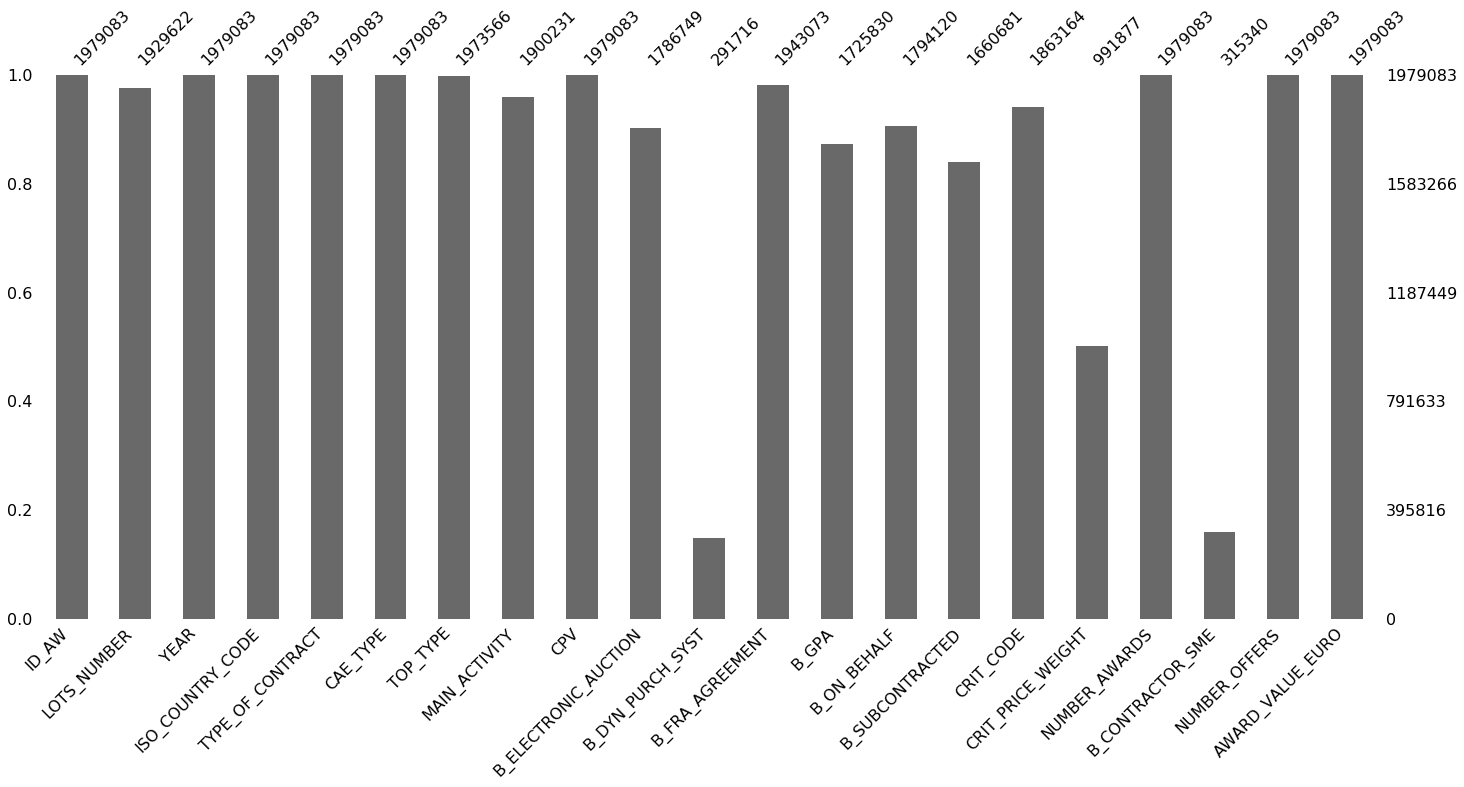

In [10]:
import missingno as msno
msno.bar(train_number_offers)

In [5]:

from sklearn.preprocessing import LabelEncoder



# list categorical features
categorical_features = ['ISO_COUNTRY_CODE',
 'TYPE_OF_CONTRACT',
 'CAE_TYPE',
 'TOP_TYPE',
 'MAIN_ACTIVITY',
 'CPV',
 'B_ELECTRONIC_AUCTION',
 'B_FRA_AGREEMENT',
 'B_GPA',
 'B_ON_BEHALF',
 'B_SUBCONTRACTED',
 'CRIT_CODE']
for col in train_number_offers[categorical_features].columns.tolist():
    train_number_offers[col] = train_number_offers[col].astype(str)
    
# label encoding
from sklearn.preprocessing import LabelEncoder
for var in categorical_features:
    encoder = LabelEncoder()
    train_number_offers['le_{}'.format(var)] = encoder.fit_transform(train_number_offers[var])
    train_number_offers.loc[train_number_offers[var].isnull(), 'le_{}'.format(var)] = -1
    

    # value counts
for var in categorical_features:
    mapping_vc = train_number_offers[var].value_counts()
    train_number_offers['vc_{}'.format(var)] = train_number_offers[var].map(mapping_vc)
    


In [13]:
train_number_offers.columns.tolist()

['ID_AW',
 'LOTS_NUMBER',
 'YEAR',
 'ISO_COUNTRY_CODE',
 'TYPE_OF_CONTRACT',
 'CAE_TYPE',
 'TOP_TYPE',
 'MAIN_ACTIVITY',
 'CPV',
 'B_ELECTRONIC_AUCTION',
 'B_DYN_PURCH_SYST',
 'B_FRA_AGREEMENT',
 'B_GPA',
 'B_ON_BEHALF',
 'B_SUBCONTRACTED',
 'CRIT_CODE',
 'CRIT_PRICE_WEIGHT',
 'NUMBER_AWARDS',
 'B_CONTRACTOR_SME',
 'NUMBER_OFFERS',
 'AWARD_VALUE_EURO',
 'le_ISO_COUNTRY_CODE',
 'le_TYPE_OF_CONTRACT',
 'le_CAE_TYPE',
 'le_TOP_TYPE',
 'le_MAIN_ACTIVITY',
 'le_CPV',
 'le_B_ELECTRONIC_AUCTION',
 'le_B_FRA_AGREEMENT',
 'le_B_GPA',
 'le_B_ON_BEHALF',
 'le_B_SUBCONTRACTED',
 'le_CRIT_CODE',
 'vc_ISO_COUNTRY_CODE',
 'vc_TYPE_OF_CONTRACT',
 'vc_CAE_TYPE',
 'vc_TOP_TYPE',
 'vc_MAIN_ACTIVITY',
 'vc_CPV',
 'vc_B_ELECTRONIC_AUCTION',
 'vc_B_FRA_AGREEMENT',
 'vc_B_GPA',
 'vc_B_ON_BEHALF',
 'vc_B_SUBCONTRACTED',
 'vc_CRIT_CODE']

In [6]:
train_number_offers = train_number_offers.\
        loc[:, train_number_offers.columns.difference(categorical_features)]\
            .copy()

In [49]:
predictors = [
    'AWARD_VALUE_EURO',
 #'B_CONTRACTOR_SME',
 #'B_DYN_PURCH_SYST',
 #'CRIT_PRICE_WEIGHT',
# 'ID_AW',
 'LOTS_NUMBER',
 #'NUMBER_AWARDS',
 #'NUMBER_OFFERS',
 'YEAR',
 'le_B_ELECTRONIC_AUCTION',
 'le_B_FRA_AGREEMENT',
 'le_B_GPA',
 'le_B_ON_BEHALF',
 'le_B_SUBCONTRACTED',
 'le_CAE_TYPE',
 'le_CPV',
 'le_CRIT_CODE',
 'le_ISO_COUNTRY_CODE',
 'le_MAIN_ACTIVITY',
 'le_TOP_TYPE',
 'le_TYPE_OF_CONTRACT',
 'vc_B_ELECTRONIC_AUCTION',
 'vc_B_FRA_AGREEMENT',
 'vc_B_GPA',
 'vc_B_ON_BEHALF',
 'vc_B_SUBCONTRACTED',
 'vc_CAE_TYPE',
 'vc_CPV',
 'vc_CRIT_CODE',
 'vc_ISO_COUNTRY_CODE',
 'vc_MAIN_ACTIVITY',
 'vc_TOP_TYPE',
 'vc_TYPE_OF_CONTRACT'
]

response = 'target'

In [8]:
# Split the dataset into a train and valid set:
train_number_offers.rename(columns={'NUMBER_OFFERS': 'target'},
             inplace=True)

In [9]:
data_h2o_2 = h2o.H2OFrame(train_number_offers)
train_h2o_2, test_h2o_2 = data_h2o_2.split_frame(ratios=[.7], seed=1234)

Parse progress: |█████████████████████████████████████████████████████████| 100%


In [10]:
print("data train: ",train_h2o_2.shape,"\n", "data test: ",test_h2o_2.shape)

data train:  (1385486, 33) 
 data test:  (593597, 33)


In [28]:
# try using the `model_id` parameter:
# first initialize your estimator

gbm_2 = H2OGradientBoostingEstimator(model_id = "first_model_2", seed = 1234)

# training_frame and validation_frame
gbm_2.train(x = predictors, y = response, training_frame = train_h2o_2, validation_frame = test_h2o_2)

gbm Model Build progress: |███████████████████████████████████████████████| 100%


In [29]:
gbm_2

Model Details
H2OGradientBoostingEstimator :  Gradient Boosting Machine
Model Key:  first_model_2


Model Summary: 


,,number_of_trees,number_of_internal_trees,model_size_in_bytes,min_depth,max_depth,mean_depth,min_leaves,max_leaves,mean_leaves
0,,50.0,50.0,22542.0,5.0,5.0,5.0,28.0,32.0,31.2




ModelMetricsRegression: gbm
** Reported on train data. **

MSE: 143.1333295089709
RMSE: 11.963834231088748
MAE: 4.0596728070556765
RMSLE: NaN
Mean Residual Deviance: 143.1333295089709

ModelMetricsRegression: gbm
** Reported on validation data. **

MSE: 144.5626863174493
RMSE: 12.02342240451733
MAE: 4.068537102283571
RMSLE: NaN
Mean Residual Deviance: 144.5626863174493

Scoring History: 


,,timestamp,duration,number_of_trees,training_rmse,training_mae,training_deviance,validation_rmse,validation_mae,validation_deviance
0,,2020-10-21 14:13:08,0.028 sec,0.0,45.137019,8.445822,2037.350444,45.303400,8.470084,2052.398008
1,,2020-10-21 14:13:12,3.592 sec,1.0,41.108957,8.003529,1689.946380,41.247330,8.024972,1701.342198
2,,2020-10-21 14:13:22,13.599 sec,9.0,21.791251,5.898143,474.858614,21.747992,5.909235,472.975137
3,,2020-10-21 14:13:29,20.517 sec,15.0,16.371811,5.158268,268.036191,16.255547,5.167425,264.242807
4,,2020-10-21 14:13:34,25.601 sec,19.0,14.789035,4.835111,218.715552,14.636317,4.842241,214.221771
5,,2020-10-21 14:13:39,30.338 sec,23.0,13.969714,4.614415,195.152915,13.793846,4.620296,190.270193
6,,2020-10-21 14:13:43,34.770 sec,26.0,13.583783,4.493427,184.519171,13.395959,4.497545,179.451706
7,,2020-10-21 14:13:49,41.024 sec,30.0,13.112552,4.358840,171.939031,12.967510,4.362316,168.156315
8,,2020-10-21 14:13:55,46.270 sec,33.0,12.944018,4.299090,167.547594,12.799492,4.301403,163.826987
9,,2020-10-21 14:14:00,51.211 sec,37.0,12.609176,4.226618,158.991332,12.542487,4.229872,157.313980



Variable Importances: 


,variable,relative_importance,scaled_importance,percentage
0,le_CPV,7.048911e+09,1.000000,0.510323
1,vc_ISO_COUNTRY_CODE,5.221387e+09,0.740737,0.378015
2,le_CRIT_CODE,8.518700e+08,0.120851,0.061673
3,NUMBER_AWARDS,1.784980e+08,0.025323,0.012923
4,LOTS_NUMBER,8.660541e+07,0.012286,0.006270
5,vc_CAE_TYPE,7.749170e+07,0.010993,0.005610
6,AWARD_VALUE_EURO,7.683738e+07,0.010901,0.005563
7,le_ISO_COUNTRY_CODE,6.936738e+07,0.009841,0.005022
8,vc_CPV,6.139586e+07,0.008710,0.004445
9,YEAR,4.751138e+07,0.006740,0.003440



See the whole table with table.as_data_frame()


In [11]:
# XGBOOST 0
from h2o.estimators import H2OXGBoostEstimator
# Build and train the model:
xgb_2 = H2OXGBoostEstimator(booster='dart',
                                  normalize_type="tree",
                                  seed=1234)
xgb_2.train(x=predictors,
                  y=response,
                  training_frame=train_h2o_2,
                  validation_frame=test_h2o_2)



xgboost Model Build progress: |███████████████████████████████████████████| 100%


In [13]:
xgb_2

Model Details
H2OXGBoostEstimator :  XGBoost
Model Key:  XGBoost_model_python_1603284309962_1


Model Summary: 


,,number_of_trees
0,,50.0




ModelMetricsRegression: xgboost
** Reported on train data. **

MSE: 85.66534157972956
RMSE: 9.255557334905854
MAE: 3.297730858624689
RMSLE: NaN
Mean Residual Deviance: 85.66534157972956

ModelMetricsRegression: xgboost
** Reported on validation data. **

MSE: 95.7039270118614
RMSE: 9.78283839240235
MAE: 3.3298509857361474
RMSLE: NaN
Mean Residual Deviance: 95.7039270118614

Scoring History: 


,,timestamp,duration,number_of_trees,training_rmse,training_mae,training_deviance,validation_rmse,validation_mae,validation_deviance
0,,2020-10-21 14:47:18,0.036 sec,0.0,45.707401,7.198860,2089.166551,45.875805,7.224977,2104.589486
1,,2020-10-21 14:47:32,14.258 sec,2.0,25.377080,4.909483,643.996208,25.390699,4.923357,644.687604
2,,2020-10-21 14:47:39,21.845 sec,3.0,20.183217,4.606124,407.362237,20.140524,4.618242,405.640699
3,,2020-10-21 14:47:52,34.738 sec,5.0,15.024284,4.280990,225.729104,14.888843,4.290129,221.677652
4,,2020-10-21 14:47:58,40.614 sec,6.0,13.883056,4.212435,192.739247,13.750961,4.222438,189.088939
5,,2020-10-21 14:48:06,48.032 sec,7.0,13.222466,4.146890,174.833619,13.055422,4.155562,170.444033
6,,2020-10-21 14:48:21,1 min 3.065 sec,9.0,12.341431,4.023289,152.310923,12.260835,4.033542,150.328086
7,,2020-10-21 14:48:34,1 min 16.398 sec,11.0,12.024419,3.955882,144.586663,11.950278,3.967597,142.809151
8,,2020-10-21 14:48:41,1 min 23.434 sec,12.0,11.855699,3.914506,140.557609,11.823603,3.926805,139.797592
9,,2020-10-21 14:48:48,1 min 30.680 sec,13.0,11.782493,3.889349,138.827147,11.751109,3.901901,138.088560



See the whole table with table.as_data_frame()

Variable Importances: 


,variable,relative_importance,scaled_importance,percentage
0,le_CPV,2.269381e+09,1.000000,0.428162
1,vc_ISO_COUNTRY_CODE,2.104218e+09,0.927222,0.397001
2,le_CRIT_CODE,5.339992e+08,0.235306,0.100749
3,NUMBER_AWARDS,7.795060e+07,0.034349,0.014707
4,LOTS_NUMBER,7.200251e+07,0.031728,0.013585
5,AWARD_VALUE_EURO,5.132832e+07,0.022618,0.009684
6,vc_CAE_TYPE,4.573118e+07,0.020151,0.008628
7,vc_CPV,3.687830e+07,0.016250,0.006958
8,le_ISO_COUNTRY_CODE,3.533509e+07,0.015570,0.006667
9,le_B_GPA,2.098223e+07,0.009246,0.003959



See the whole table with table.as_data_frame()


## TEST DE SOUMISSION MODELE 2

In [56]:
data_soumission = pd.read_csv('dataChallenge_test_reponses_fausses.csv')

data_soumission.YEAR = data_soumission.YEAR.astype('object') 



from sklearn.preprocessing import LabelEncoder



# list categorical features
categorical_features = ['ISO_COUNTRY_CODE',
 'TYPE_OF_CONTRACT',
 'CAE_TYPE',
 'TOP_TYPE',
 'MAIN_ACTIVITY',
 'CPV',
 'B_ELECTRONIC_AUCTION',
 'B_FRA_AGREEMENT',
 'B_GPA',
 'B_ON_BEHALF',
 'B_SUBCONTRACTED',
 'CRIT_CODE']
for col in data_soumission[categorical_features].columns.tolist():
    data_soumission[col] = data_soumission[col].astype(str)
    
# label encoding
from sklearn.preprocessing import LabelEncoder
for var in categorical_features:
    encoder = LabelEncoder()
    data_soumission['le_{}'.format(var)] = encoder.fit_transform(data_soumission[var])
    data_soumission.loc[data_soumission[var].isnull(), 'le_{}'.format(var)] = -1
    

    # value counts
for var in categorical_features:
    mapping_vc = data_soumission[var].value_counts()
    data_soumission['vc_{}'.format(var)] = data_soumission[var].map(mapping_vc)
    

train_number_offers = data_soumission.\
        loc[:, data_soumission.columns.difference(categorical_features)]\
            .copy()


In [16]:
data_soumission.shape

(949856, 45)

In [65]:
data_soumission_h2o_2 = h2o.H2OFrame(data_soumission)

Parse progress: |█████████████████████████████████████████████████████████| 100%


In [66]:
data_soumission_h2o_2 = data_soumission_h2o_2[predictors]

In [67]:
pred_3 = xgb_2.predict(data_soumission_h2o_2)

xgboost prediction progress: |████████████████████████████████████████████| 100%


In [69]:
pred_3 = pred_3.as_data_frame()

In [74]:
pred['']

Index(['predict'], dtype='object')

In [32]:

pred = pd.read_csv('soumission.csv', sep = ';')

In [75]:
pred['AWARD_VALUE_EURO'] = pred_2['predict']

In [35]:
pred.to_csv('soumission_2.csv', sep=";")

In [78]:
pred.to_csv('soumission_final_saturne.csv')

# modelisation: AWARD_VALUE_EURO

In [12]:
train_number_offers.columns

Index(['AWARD_VALUE_EURO', 'B_CONTRACTOR_SME', 'B_DYN_PURCH_SYST',
       'CRIT_PRICE_WEIGHT', 'ID_AW', 'LOTS_NUMBER', 'NUMBER_AWARDS', 'target',
       'YEAR', 'le_B_ELECTRONIC_AUCTION', 'le_B_FRA_AGREEMENT', 'le_B_GPA',
       'le_B_ON_BEHALF', 'le_B_SUBCONTRACTED', 'le_CAE_TYPE', 'le_CPV',
       'le_CRIT_CODE', 'le_ISO_COUNTRY_CODE', 'le_MAIN_ACTIVITY',
       'le_TOP_TYPE', 'le_TYPE_OF_CONTRACT', 'vc_B_ELECTRONIC_AUCTION',
       'vc_B_FRA_AGREEMENT', 'vc_B_GPA', 'vc_B_ON_BEHALF',
       'vc_B_SUBCONTRACTED', 'vc_CAE_TYPE', 'vc_CPV', 'vc_CRIT_CODE',
       'vc_ISO_COUNTRY_CODE', 'vc_MAIN_ACTIVITY', 'vc_TOP_TYPE',
       'vc_TYPE_OF_CONTRACT'],
      dtype='object')

In [59]:
# Split the dataset into a train and valid set:
train_number_offers.rename(columns={'NUMBER_AWARDS': 'target'}, 
             inplace=True)


predictors = [
    
 #'B_CONTRACTOR_SME',
 #'B_DYN_PURCH_SYST',
 #'CRIT_PRICE_WEIGHT',
# 'ID_AW',
 'LOTS_NUMBER',
 #'NUMBER_AWARDS',
 'NUMBER_OFFERS',
 'YEAR',
 'le_B_ELECTRONIC_AUCTION',
 'le_B_FRA_AGREEMENT',
 'le_B_GPA',
 'le_B_ON_BEHALF',
 'le_B_SUBCONTRACTED',
 'le_CAE_TYPE',
 'le_CPV',
 'le_CRIT_CODE',
 'le_ISO_COUNTRY_CODE',
 'le_MAIN_ACTIVITY',
 'le_TOP_TYPE',
 'le_TYPE_OF_CONTRACT',
 'vc_B_ELECTRONIC_AUCTION',
 'vc_B_FRA_AGREEMENT',
 'vc_B_GPA',
 'vc_B_ON_BEHALF',
 'vc_B_SUBCONTRACTED',
 'vc_CAE_TYPE',
 'vc_CPV',
 'vc_CRIT_CODE',
 'vc_ISO_COUNTRY_CODE',
 'vc_MAIN_ACTIVITY',
 'vc_TOP_TYPE',
 'vc_TYPE_OF_CONTRACT'
]

response = 'target'

In [39]:
data_h2o = h2o.H2OFrame(train_number_offers)
train_h2o_3, test_h2o_3 = data_h2o.split_frame(ratios=[.7], seed=1234)

Parse progress: |█████████████████████████████████████████████████████████| 100%


In [41]:
# XGBOOST 0
from h2o.estimators import H2OXGBoostEstimator
# Build and train the model:
xgb_2 = H2OXGBoostEstimator(booster='dart',
                                  normalize_type="tree",
                                  seed=1234)
xgb_2.train(x=predictors,
                  y=response,
                  training_frame=train_h2o_3,
                  validation_frame=test_h2o_3)



xgboost Model Build progress: |███████████████████████████████████████████| 100%


In [63]:
data_soumission = pd.read_csv('dataChallenge_test_reponses_fausses.csv')

data_soumission.YEAR = data_soumission.YEAR.astype('object') 



from sklearn.preprocessing import LabelEncoder



# list categorical features
categorical_features = ['ISO_COUNTRY_CODE',
 'TYPE_OF_CONTRACT',
 'CAE_TYPE',
 'TOP_TYPE',
 'MAIN_ACTIVITY',
 'CPV',
 'B_ELECTRONIC_AUCTION',
 'B_FRA_AGREEMENT',
 'B_GPA',
 'B_ON_BEHALF',
 'B_SUBCONTRACTED',
 'CRIT_CODE']
for col in data_soumission[categorical_features].columns.tolist():
    data_soumission[col] = data_soumission[col].astype(str)
    
# label encoding
from sklearn.preprocessing import LabelEncoder
for var in categorical_features:
    encoder = LabelEncoder()
    data_soumission['le_{}'.format(var)] = encoder.fit_transform(data_soumission[var])
    data_soumission.loc[data_soumission[var].isnull(), 'le_{}'.format(var)] = -1
    

    # value counts
for var in categorical_features:
    mapping_vc = data_soumission[var].value_counts()
    data_soumission['vc_{}'.format(var)] = data_soumission[var].map(mapping_vc)
    

train_number_offers = data_soumission.\
        loc[:, data_soumission.columns.difference(categorical_features)]\
            .copy()


In [62]:
data_soumission_h2o_2 = data_soumission_h2o_2[['LOTS_NUMBER',
 #'NUMBER_AWARDS',
 'NUMBER_OFFERS',
 'YEAR',
 'le_B_ELECTRONIC_AUCTION',
 'le_B_FRA_AGREEMENT',
 'le_B_GPA',
 'le_B_ON_BEHALF',
 'le_B_SUBCONTRACTED',
 'le_CAE_TYPE',
 'le_CPV',
 'le_CRIT_CODE',
 'le_ISO_COUNTRY_CODE',
 'le_MAIN_ACTIVITY',
 'le_TOP_TYPE', 'le_TYPE_OF_CONTRACT',
 'vc_B_ELECTRONIC_AUCTION',
 'vc_B_FRA_AGREEMENT',
 'vc_B_GPA',
 'vc_B_ON_BEHALF',
 'vc_B_SUBCONTRACTED',
 'vc_CAE_TYPE',
 'vc_CPV',
 'vc_CRIT_CODE',
 'vc_ISO_COUNTRY_CODE',
 'vc_MAIN_ACTIVITY',
 'vc_TOP_TYPE',
 'vc_TYPE_OF_CONTRACT']]

H2OResponseError: Server error water.exceptions.H2OKeyNotFoundArgumentException:
  Error: Object 'py_8_sid_97a3' not found for argument: key
  Request: GET /3/Frames/py_8_sid_97a3
    params: {'row_count': '10', 'row_offset': '0', 'column_count': '-1', 'full_column_count': '-1', 'column_offset': '0'}


In [47]:
pred_2 = xgb_2.predict(data_soumission_h2o_2)

NameError: name 'xgb_3' is not defined

In [80]:
data_soumission_h2o_2.columns

['LOTS_NUMBER',
 'NUMBER_OFFERS',
 'YEAR',
 'le_B_ELECTRONIC_AUCTION',
 'le_B_FRA_AGREEMENT',
 'le_B_GPA',
 'le_B_ON_BEHALF',
 'le_B_SUBCONTRACTED',
 'le_CAE_TYPE',
 'le_CPV',
 'le_CRIT_CODE',
 'le_ISO_COUNTRY_CODE',
 'le_MAIN_ACTIVITY',
 'le_TOP_TYPE',
 'le_TYPE_OF_CONTRACT',
 'vc_B_ELECTRONIC_AUCTION',
 'vc_B_FRA_AGREEMENT',
 'vc_B_GPA',
 'vc_B_ON_BEHALF',
 'vc_B_SUBCONTRACTED',
 'vc_CAE_TYPE',
 'vc_CPV',
 'vc_CRIT_CODE',
 'vc_ISO_COUNTRY_CODE',
 'vc_MAIN_ACTIVITY',
 'vc_TOP_TYPE',
 'vc_TYPE_OF_CONTRACT']

In [81]:
pred_2

,predict
0,4.313994
1,9.309743
2,4.313994
3,9.309743
4,9.309743
...,...
949851,2.881979
949852,2.819941
949853,5.742922
949854,8.353762
